In [215]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import json
import requests
from pprint import pprint

In [446]:
with open('Resources/US_category_id.json') as file:
    data = json.load(file)

In [217]:
id_to_category = {}

for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
        


In [218]:
file_Q1=pd.read_csv("Resources/USvideos.csv")

In [380]:
#file_Q1

In [323]:
groupby_Q1=file_Q1.groupby(["Year","Month"],as_index=False)
month=groupby_Q1.sum()
month

,Year,Month,Day,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17,11,74800,67317,4206798140,159032378,5412376,17620212,62.0,18.0,1.0
1,17,12,99200,124339,8237204070,297367071,23602890,38116869,123.0,27.0,0.0
2,18,1,94878,116076,6441668933,251882440,22243761,38205914,69.0,33.0,0.0
3,18,2,80924,111399,8046104893,217896307,10478352,25112552,108.0,53.0,3.0
4,18,3,98960,127542,11548564376,402809262,14429156,46366902,81.0,29.0,0.0
5,18,4,80400,96292,14590073499,442508556,16760897,45480068,50.0,9.0,8.0
6,18,5,99185,123170,29181106586,828146533,36880602,89934140,111.0,0.0,11.0
7,18,6,21000,51716,14420249655,441504651,22170121,45051507,29.0,0.0,0.0


In [221]:
x_axis=[1,2,3,4,5,6,7,8]

In [237]:
x_month_bar = month["Month"]

y_views_bar = month["views"]
y_comment_bar = month["comment_count"]
y_likes_bar = month["likes"]
y_dislikes_bar = month["dislikes"]

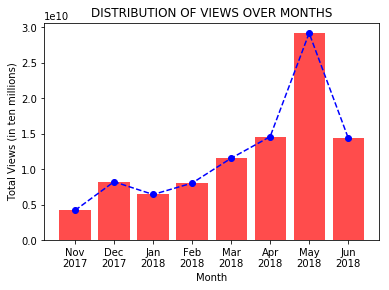

In [304]:
plt.bar(x_axis,y_views_bar,color="r",alpha=0.7)
plt.plot(x_axis, y_views_bar,'b--',marker="o")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.xlabel("Month")
plt.ylabel("Total Views (in ten millions)")
plt.title("DISTRIBUTION OF VIEWS OVER MONTHS")
plt.show()

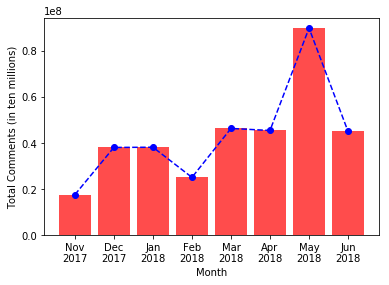

In [224]:
plt.bar(x_axis,y_comment_bar,color="r",alpha=0.7)
plt.plot(x_axis, y_comment_bar,'b--',marker="o")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.xlabel("Month")
plt.ylabel("Total Comments (in ten millions)")
plt.show()

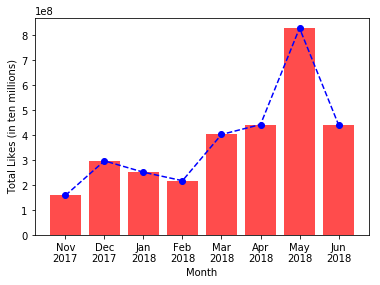

In [225]:
plt.bar(x_axis,y_likes_bar,color="r",alpha=0.7)
plt.plot(x_axis, y_likes_bar,'b--',marker="o")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.xlabel("Month")
plt.ylabel("Total Likes (in ten millions)")
plt.show()

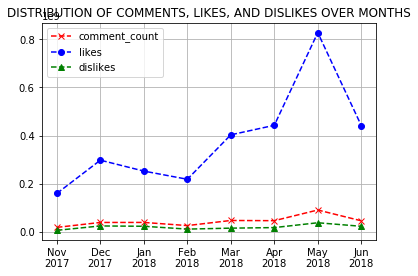

In [328]:
plt.plot(x_axis, y_comment_bar,'r--',marker="x")
plt.plot(x_axis, y_likes_bar,'b--',marker="o")
plt.plot(x_axis, y_dislikes_bar,'g--',marker="^")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.title("DISTRIBUTION OF COMMENTS, LIKES, AND DISLIKES OVER MONTHS",loc='center')
plt.legend()
plt.grid()

WHAT MAKES MAY APPEAR TO BE SIGNIFICANTLY LARGER? POSSIBLE OUTLIERS?

In [249]:
may_data = file_Q1[(file_Q1.Month==5)]

In [299]:
may_views = may_data.groupby(["title","Year","Month"], as_index=False)
may_views_sum = may_views.sum()

In [447]:
may_views_sort = may_views_sum.sort_values(['views'], ascending=False)
may_views_sort.head(5)

,title,Year,Month,Day,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
156,Childish Gambino - This Is America (Official V...,18,5,454,230,3312786299,86714965,5372788,9121720,0.0,0.0,0.0
94,BTS (방탄소년단) 'FAKE LOVE' Official MV,18,5,325,130,1160177371,66221223,2182884,14339906,0.0,0.0,0.0
71,Ariana Grande - No Tears Left To Cry,18,5,59,100,1057426403,28100134,1119560,2260729,0.0,0.0,0.0
105,"Becky G, Natti Natasha - Sin Pijama (Official ...",18,5,60,100,878139569,11774044,987745,699996,0.0,0.0,0.0
425,Maluma - Marinero (Official Video),18,5,373,210,803455479,15314079,1065209,864473,0.0,0.0,0.0


In [343]:
import scipy.stats as stats
from scipy.stats import linregress

slope: 47586970.353808    intercept: -720641503.304575
4.33864405419408e-46
r-squared: 0.239620


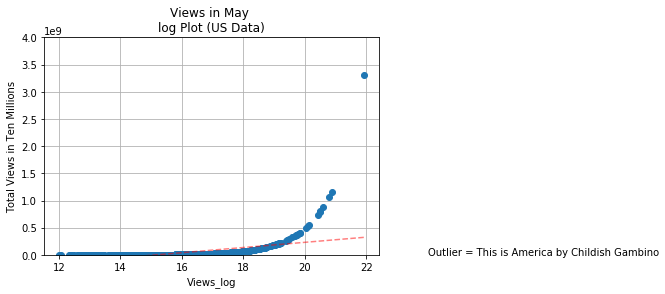

In [445]:
#scatterplot may views
#fig, ax = plt.subplots()

may_views_sort['may_views_log'] = np.log(may_views_sort['views'] + 1)
plt.plot(may_views_sort['may_views_log'], may_views_sort['views'], linewidth=0, marker='o')
plt.text(24,4, "Outlier = This is America by Childish Gambino")

slope, intercept, r_value, p_value, std_err = linregress(may_views_sort["may_views_log"],may_views_sort["views"])
plt.plot(may_views_sort["may_views_log"],slope*may_views_sort["may_views_log"]+intercept,'r--',alpha=0.5,label="linear regression")
print("slope: %f    intercept: %f" % (slope, intercept))
print(p_value)
print("r-squared: %f" % r_value**2)

plt.xlabel("Views_log")
plt.ylabel("Total Views in Ten Millions")
plt.title("Views in May \nlog Plot (US Data)")
plt.ylim(0,4000000000)
plt.grid()

WHAT HAPPENS WHEN WE REMOVE "THIS IS AMERICA"? DO THE STATS SIGNIFICANTLY CHANGE?

In [274]:
file_Q1_edited=pd.read_csv("Resources/USvideos_edited.csv")

In [276]:
groupby_Q1_edited=file_Q1_edited.groupby(["Year","Month"],as_index=False)
month_edited=groupby_Q1_edited.sum()
month_edited

,Year,Month,Day,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,17,11,74800,67317,4206798140,159032378,5412376,17620212,62.0,18.0,1.0
1,17,12,99200,124339,8237204070,297367071,23602890,38116869,123.0,27.0,0.0
2,18,1,94878,116076,6441668933,251882440,22243761,38205914,69.0,33.0,0.0
3,18,2,80924,111399,8046104893,217896307,10478352,25112552,108.0,53.0,3.0
4,18,3,98960,127542,11548564376,402809262,14429156,46366902,81.0,29.0,0.0
5,18,4,80400,96292,14590073499,442508556,16760897,45480068,50.0,9.0,8.0
6,18,5,98731,122940,25868320287,741431568,31507814,80812420,111.0,0.0,11.0
7,18,6,20997,51696,13974547189,431518798,21488475,44021938,29.0,0.0,0.0


In [277]:
x_axis=[1,2,3,4,5,6,7,8]

In [279]:
x_month_noamerica = month_edited["Month"]

y_views_noamerica = month_edited["views"]
y_comment_noamerica = month_edited["comment_count"]
y_likes_noamerica = month_edited["likes"]
y_dislikes_noamerica = month_edited["dislikes"]

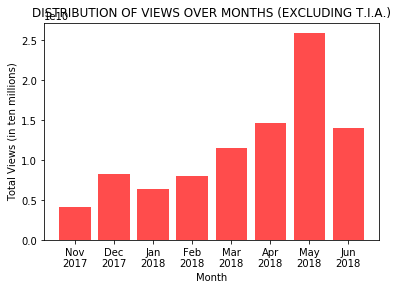

In [313]:
plt.bar(x_axis,y_views_noamerica,color="r",alpha=0.7)
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.xlabel("Month")
plt.title("DISTRIBUTION OF VIEWS OVER MONTHS (EXCLUDING T.I.A.)")
plt.ylabel("Total Views (in ten millions)")
plt.show()

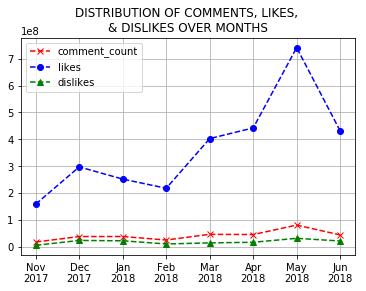

In [438]:
plt.plot(x_axis, y_comment_noamerica,'r--',marker="x")
plt.plot(x_axis, y_likes_noamerica,'b--',marker="o")
plt.plot(x_axis, y_dislikes_noamerica,'g--',marker="^")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.title("DISTRIBUTION OF COMMENTS, LIKES, \n& DISLIKES OVER MONTHS")
plt.legend()
plt.grid()

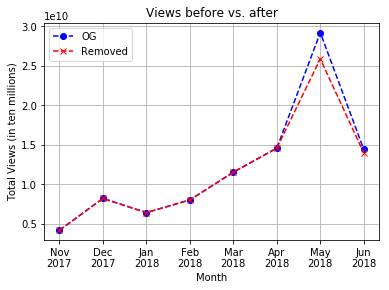

In [331]:
plt.plot(x_axis, y_views_bar,'b--',marker="o", label="OG")
plt.plot(x_axis, y_views_noamerica,'r--',marker="x", label="Removed")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.xlabel("Month")
plt.ylabel("Total Views (in ten millions)")
plt.title("Views before vs. after")
plt.legend()
plt.grid()

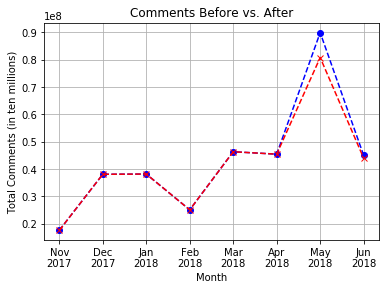

In [332]:
plt.plot(x_axis, y_comment_bar,'b--',marker="o", label="OG")
plt.plot(x_axis, y_comment_noamerica,'r--',marker="x", label="Removed")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.xlabel("Month")
plt.ylabel("Total Comments (in ten millions)")
plt.title("Comments Before vs. After")
plt.grid()

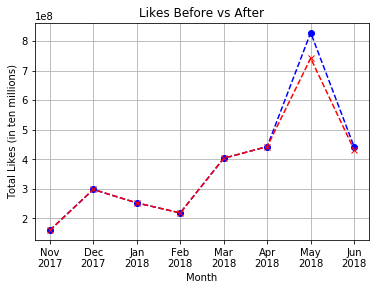

In [334]:
plt.plot(x_axis, y_likes_bar,'b--',marker="o")
plt.plot(x_axis, y_likes_noamerica,'r--',marker="x")
plt.xticks(x_axis,["Nov\n2017","Dec\n2017","Jan\n2018","Feb\n2018","Mar\n2018","Apr\n2018","May\n2018","Jun\n2018"])
plt.xlabel("Month")
plt.ylabel("Total Likes (in ten millions)")
plt.title("Likes Before vs After")
plt.grid()

In [283]:
may_data_noamerica = file_Q1_edited[(file_Q1_edited.Month==5)]

In [288]:
#scatterplot of views in May by video
may_views_noamerica = may_data_noamerica.groupby(["title","Year","Month"], as_index=False)
may_views_noamerica_sum = may_views_noamerica.sum()

In [319]:
#trying to break down why May has so many views. Possible outliers?
may_views_sort_noamerica = may_views_noamerica_sum.sort_values(['views'], ascending=False)

slope: 38185118.690466    intercept: -574613709.306781
9.455507940920719e-76
r-squared: 0.367502


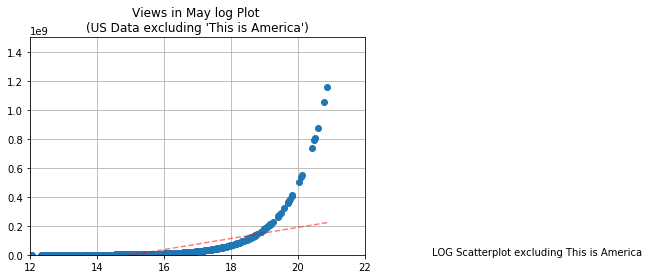

In [432]:
#scatterplot may views
#fig, ax = plt.subplots()

may_views_sort_noamerica['may_views_log'] = np.log(may_views_sort_noamerica['views'] + 1)
plt.plot(may_views_sort_noamerica['may_views_log'], may_views_sort_noamerica['views'], linewidth=0, marker='o')

slope, intercept, r_value, p_value, std_err = linregress(may_views_sort_noamerica["may_views_log"],may_views_sort_noamerica["views"])
plt.plot(may_views_sort_noamerica["may_views_log"],slope*may_views_sort_noamerica["may_views_log"]+intercept,'r--',alpha=0.5,label="linear regression")
print("slope: %f    intercept: %f" % (slope, intercept))
print(p_value)
print("r-squared: %f" % r_value**2)

plt.text(24,4, "LOG Scatterplot excluding This is America")
plt.title("Views in May log Plot \n(US Data excluding 'This is America')")
plt.xlim(12,22)
plt.ylim(-100,1500000000)
plt.grid()

In [376]:
may_avg = may_views_sort["views"].mean()
noamerica_avg = may_views_sort_noamerica["views"].mean()
delta_avg = may_views_sort["views"].mean() - may_views_sort_noamerica["views"].mean()

In [372]:
print(f"Average of views in May: {may_avg}")
print(f"Average of views in May excluding 'This is America': {noamerica_avg}")
print(f"The difference in averages: {delta_avg}")

Average of views in May: 39221917.454301074
Average of views in May excluding 'This is America': 34816043.45491251
The difference in averages: 4405873.999388561
